In [5]:
import requests
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline 

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# downloading the images.tsv file from the url 
folder_name = 'images'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [12]:
images = pd.read_csv('images/image-predictions.tsv', sep=('\t'))

In [6]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,  wait_on_rate_limit=True)

In [7]:
tweet_ids = twitter_archive.tweet_id.values
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e  :
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 184


Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933: 754011816964026368
Fail
934

Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
1184: 718939241951195136
Success
11

Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
1433: 697482927769255936
Success
14

Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
1682: 681981167097122816
Success
16

Rate limit reached. Sleeping for: 195


Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833: 676191832485810177
Success
18

Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
2082: 670822709593571328
Success
20

Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
2331: 666362758909284353
Success
23

In [8]:
df_list = []
with open("tweet_json.txt") as file:
    lines = file.readlines()
    for line in range(len(lines)): 
        id = lines[line].split(',')[1].split(':')[1]
        favorite = lines[line].split(',')[-6].split(':')[1]
        retweet= lines[line].split(',')[-7].split(':')[1]
        df_list.append({'tweet_id':id,
                        'favorite_count':favorite,
                        'retweet_count': retweet})

In [9]:
tweet_activity = pd.DataFrame.from_records(df_list) 

## Assessing Data

In [10]:
twitter_archive 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
tweet_activity

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33820,7016
1,892177421306343426,29340,5302
2,891815181378084864,22063,3483
3,891689557279858688,36927,7221
4,891327558926688256,35304,7768
...,...,...,...
2319,666049248165822465,89,37
2320,666044226329800704,245,115
2321,666033412701032449,99,36
2322,666029285002620928,112,39


In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
tweet_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2324 non-null   object
 1   favorite_count  2324 non-null   object
 2   retweet_count   2324 non-null   object
dtypes: object(3)
memory usage: 54.6+ KB


In [18]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1224,714214115368108032,NaN,NaN,2016-03-27 22:14:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Easter from the squad! 🐇🐶 13/10 for all ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714214115...,13,10,None,None,None,None,None
1573,687494652870668288,NaN,NaN,2016-01-14 04:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marq. He stole this car. 7/10 wtf Marq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687494652...,7,10,Marq,None,None,None,None
429,821107785811234820,NaN,NaN,2017-01-16 21:32:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who looks like he's about to gi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821107785...,11,10,None,doggo,None,None,None
1755,678774928607469569,NaN,NaN,2015-12-21 03:12:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tug. He's not required to wear the con...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678774928...,11,10,Tug,None,None,None,None
183,856543823941562368,NaN,NaN,2017-04-24 16:22:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Callie. She'll be your navigator today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/856543823...,12,10,Callie,None,None,None,None


In [19]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
1016,709901256215666688,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,0.998814,False,handkerchief,0.000512,False,umbrella,0.000224,False
973,706681918348251136,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,toy_poodle,0.717584,True,miniature_poodle,0.151433,True,Norwich_terrier,0.047087,True
1179,738156290900254721,https://pbs.twimg.com/media/Cj51Oj3VAAEVe4O.jpg,1,pug,0.751758,True,tub,0.110748,False,bathtub,0.104132,False
814,692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,2,golden_retriever,0.636845,True,Labrador_retriever,0.163362,True,Pekinese,0.045554,True


In [21]:
tweet_activity.sample(5)

,tweet_id,favorite_count,retweet_count
1637,682662431982772225,2820,987
1237,709852847387627521,3243,1093
548,802185808107208704,false,"""en""}"
819,766423258543644672,5649,1458
2038,671134062904504320,654,163


In [22]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
tweet_activity.describe()

,tweet_id,favorite_count,retweet_count
count,2324,2324,2324
unique,2324,1912,1624
top,892420643555336193,false,"""en""}"
freq,1,132,73


### Quality Issues 
1. tweet id is integer in both images and twitter archieve tables 
2. misisng tweet data (in_reply_to_status_id, in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
3. missing entries e favorite and like table 2325 instead of 2356 
4. missing entries in the images table 2075 instead of 2356
5. default a data name 
6. invalid  rating data for tweet id "835246439529840000" 960/00 instead of 13/10
7. timestamp datatype is string 
8. favourite count and retweet count are objects

### Tidiness 
1. One variable in 4 columns in the twitter_achieve table(doggo , floofer , pupper , puppo). 
2. there should be 3 tabbles (tweet data , dog info, image predictions) 

## Cleaning Data

In [158]:
#creating copies of dataframes 
twitter_archive_clean = twitter_archive.copy()
images_clean = images.copy()
tweet_activity_clean = tweet_activity.copy()

### QUALITY

 #### 1.tweet id is integer in both images and twitter archieve tables

#### Define

change the datatype of tweet id in both tableto string 

#### Code


In [159]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
images_clean['tweet_id'] = images_clean['tweet_id'].astype(str)

#### test 

In [160]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [161]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Missing Data 
 
 ##### 2. misisng tweet data (in_reply_to_status_id, in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls) 
 ##### 3. missing entries e favorite and like table 2325 instead of 2356 
 ##### 4. missing entries in the images table 2075 instead of 2356

Since there is no additional data from any other source to solve these issues I will be leaving them as they are.

#### 5. default a data name 

##### Define 

Remove the non-recoverable a records fromt the dog_info table 

##### Code 

In [164]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != 'a']

##### Test

In [166]:
twitter_archive_clean.name.value_counts()

None          745
Charlie        12
Cooper         11
Lucy           11
Oliver         11
             ... 
Aqua            1
Chase           1
Meatball        1
Rorie           1
Christoper      1
Name: name, Length: 956, dtype: int64

#### 6. invalid  rating data for tweet id "835246439529840000" 960/00 instead of 13/10

##### Define 
replace the wrong rating with the right one 

##### Code 

In [168]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.replace(960, 13)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.replace(0, 10)

C:\Users\HP\AppData\Local\Temp\ipykernel_14020\3959367408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.replace(960, 13)
C:\Users\HP\AppData\Local\Temp\ipykernel_14020\3959367408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.replace(0, 10)


##### Test 

In [170]:
twitter_archive_clean.query('rating_numerator == 960')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 7. timestamp datatype is string

##### Define
covert the datatypes of the timstamp, retweeted_status_timestamp to datetime 

##### Code 


In [172]:
#changing to date time 
#patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

C:\Users\HP\AppData\Local\Temp\ipykernel_14020\3809083719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
C:\Users\HP\AppData\Local\Temp\ipykernel_14020\3809083719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)


##### Test 

In [173]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2301 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2301 non-null   datetime64[ns, UTC]
 4   source                      2301 non-null   object             
 5   text                        2301 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2242 non-null   object             
 10  rating_numerator            2301 non-null   int64           

#### 8. favourite count and retweet count are objects

##### Define
convert the datatypes of retweet_count and favorite_count to integer

##### Code 

In [193]:
twitter_archive_clean['retweet_count'] = twitter_archive_clean['retweet_count'].astype(int)
twitter_archive_clean['favorite_count'] = twitter_archive_clean['favorite_count'].astype(int)

In [194]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7995
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    7996 non-null   object             
 1   in_reply_to_status_id       92 non-null     float64            
 2   in_reply_to_user_id         92 non-null     float64            
 3   timestamp                   7996 non-null   datetime64[ns, UTC]
 4   source                      7996 non-null   object             
 5   text                        7996 non-null   object             
 6   retweeted_status_id         284 non-null    float64            
 7   retweeted_status_user_id    284 non-null    float64            
 8   retweeted_status_timestamp  284 non-null    datetime64[ns, UTC]
 9   expanded_urls               7996 non-null   object             
 10  jpg_url                     7996 non-null   object          

### Tidiness 

##### 1. One variable in 4 columns in the twitter_archive table(doggo , floofer , pupper , puppo).

#### Define 

Melt the doggo, floofer, pupper, puppo columns into a stage column 


### Code

In [183]:
twitter_archive_clean = pd.melt(twitter_archive_clean , id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source' ,'text' , 'retweeted_status_id' , 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
            var_name= 'value', value_name='stage')
#drop the value column 
twitter_archive_clean = twitter_archive_clean.drop('value', axis=1)

#### Test

In [184]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


#### 2. there should be 2 tabbles (tweet data , dog info) 

#### Define 
 Merge the tweet_activity and tweet_achieve data and extract the name, rating_numerator, rating_denominator, stage to the images dataframe as dog info 
 
 
 #### Code

In [185]:
twitter_archive_clean = pd.merge(twitter_archive_clean, images_clean, on='tweet_id') 

In [186]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [187]:
#removing all white space from the tweet id column 
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].str.strip()
tweet_activity_clean['tweet_id'] = tweet_activity_clean['tweet_id'].str.strip()

In [188]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_activity_clean, on='tweet_id')

In [189]:
dog_info = pd.DataFrame(twitter_archive_clean[['tweet_id','name','stage','rating_numerator','rating_denominator']])

In [190]:
twitter_archive_clean = twitter_archive_clean.drop(['name','stage','rating_numerator','rating_denominator'], axis=1)

#### Test 

In [191]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33820,7016
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33820,7016
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33820,7016
3,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33820,7016
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29340,5302


In [192]:
dog_info.head()

,tweet_id,name,stage,rating_numerator,rating_denominator
0,892420643555336193,Phineas,None,13,10
1,892420643555336193,Phineas,None,13,10
2,892420643555336193,Phineas,None,13,10
3,892420643555336193,Phineas,None,13,10
4,892177421306343426,Tilly,None,13,10


# Saving Data 

In [196]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index= False)
dog_info.to_csv('dog_info.csv', index = False)

# Analyzing and Visualizing data 

In [200]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,33820,7016


In [202]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7995
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    7996 non-null   object             
 1   in_reply_to_status_id       92 non-null     float64            
 2   in_reply_to_user_id         92 non-null     float64            
 3   timestamp                   7996 non-null   datetime64[ns, UTC]
 4   source                      7996 non-null   object             
 5   text                        7996 non-null   object             
 6   retweeted_status_id         284 non-null    float64            
 7   retweeted_status_user_id    284 non-null    float64            
 8   retweeted_status_timestamp  284 non-null    datetime64[ns, UTC]
 9   expanded_urls               7996 non-null   object             
 10  jpg_url                     7996 non-null   object          

In [198]:
twitter_archive_clean.p1_dog.value_counts()

True     5892
False    2104
Name: p1_dog, dtype: int64

In [199]:
twitter_archive_clean.p2_dog.value_counts()

True     5988
False    2008
Name: p2_dog, dtype: int64

In [201]:
twitter_archive_clean.p3_dog.value_counts()

True     5792
False    2204
Name: p3_dog, dtype: int64

In [203]:
twitter_archive_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,9.200000e+01,9.200000e+01,2.840000e+02,2.840000e+02,7996.000000,7996.000000,7.996000e+03,7.996000e+03,7996.000000,7996.000000
mean,6.978112e+17,4.196984e+09,7.609110e+17,1.109101e+16,1.205603,0.594004,1.344603e-01,6.039260e-02,7583.795898,2408.646323
std,4.286923e+16,0.000000e+00,5.793342e+16,9.295786e+16,0.563424,0.272193,1.005183e-01,5.109811e-02,11348.964672,4174.659500
min,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,11.000000
25%,6.717299e+17,4.196984e+09,7.076109e+17,4.196984e+09,1.000000,0.362596,5.387110e-02,1.605590e-02,1497.000000,523.000000
50%,6.757073e+17,4.196984e+09,7.761133e+17,4.196984e+09,1.000000,0.587101,1.176080e-01,4.923690e-02,3348.000000,1145.000000
75%,7.032559e+17,4.196984e+09,7.961497e+17,4.196984e+09,1.000000,0.848362,1.955580e-01,9.272700e-02,9477.000000,2766.000000
max,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,144917.000000,70811.000000


In [205]:
#creating a column for rating
dog_info['rating'] = dog_info.rating_numerator/ dog_info.rating_denominator 

In [206]:
dog_info.head()

,tweet_id,name,stage,rating_numerator,rating_denominator,rating
0,892420643555336193,Phineas,None,13,10,1.3
1,892420643555336193,Phineas,None,13,10,1.3
2,892420643555336193,Phineas,None,13,10,1.3
3,892420643555336193,Phineas,None,13,10,1.3
4,892177421306343426,Tilly,None,13,10,1.3


In [207]:
dog_info.describe()

,rating_numerator,rating_denominator,rating
count,7996.000000,7996.000000,7996.000000
mean,12.328664,10.510755,1.176580
std,41.419993,7.256698,4.060885
min,0.000000,2.000000,0.000000
25%,10.000000,10.000000,1.000000
50%,11.000000,10.000000,1.100000
75%,12.000000,10.000000,1.200000
max,1776.000000,170.000000,177.600000


In [209]:
dog_info['rating'].value_counts()

1.200000      1876
1.000000      1660
1.100000      1632
1.300000      1096
0.900000       564
0.800000       360
0.700000       180
1.400000       148
0.500000       136
0.600000       124
0.300000        72
0.400000        48
0.200000        40
0.100000        16
0.000000         8
2.700000         4
7.500000         4
3.428571         4
1.500000         4
177.600000       4
0.818182         4
0.636364         4
2.600000         4
42.000000        4
Name: rating, dtype: int64

 ### Insights 

1. Tweets by We Rate Dogs twitter page received more likes than retweets almost 3 times as much as the mean values of both columns shows 
2. The mean rating of 1.17 proves that dogs were mostly rated above the rating_denominator as said in the rating description and 25% of dogs were rated exactly or below the rating denominator mark  
3. A majority of the dogs had a rating of 1.2.

### Visualizations 

In [217]:
twitter_archive_clean['p1_dog'].value_counts() 

True     5892
False    2104
Name: p1_dog, dtype: int64

In [222]:
true = twitter_archive_clean.p1_dog == True
false = twitter_archive_clean.p1_dog == False

In [227]:
def plot(labels,bar1,bar2,xlabel,ylabel,title):
    X = labels
    show = bar1
    nshow = bar2
    X_axis = np.arange(len(X)) 
    plt.bar(X_axis - 0.2, show, 0.4, label = 'favorite')
    plt.bar(X_axis + 0.2, nshow, 0.4, label = 'retweet')
    plt.xticks(X_axis, X)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend();

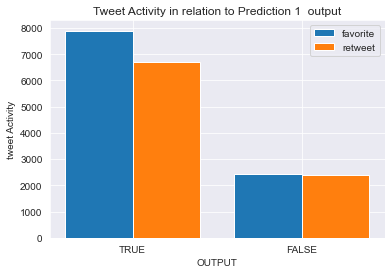

In [229]:
labels= ['TRUE','FALSE']
t = [twitter_archive_clean[true].favorite_count.mean(),twitter_archive_clean[true].retweet_count.mean()]
f = [twitter_archive_clean[false].favorite_count.mean(),twitter_archive_clean[false].retweet_count.mean()]
xlabel="OUTPUT"
ylabel= "tweet Activity"
title="Tweet Activity in relation to Prediction 1  output"
plot(labels,t,f,xlabel,ylabel,title)

From the above it shows that The tweets got more activity (favorites and retweets) when Prediction 1 which is the most accurate prediction predicts the image to be a dog  